# Changing optimization parameters

A continuación vamos a proceder a lanzar una red con un ratio de aprendizaje muy bajo, un rati de aprendizaje muy alto y un ratio de aprendizaje correcto. Cada vez que cambiamos la tasa de aprendizaje queremos que la optimización empiece desde cero, por lo que crearemos la función **get_new_model()** que crea un modelo no optimizado para que este sea optimizado.

In [6]:
#Cargamos las librerías necesarias
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
from keras.optimizers import SGD
from keras.utils import to_categorical

def get_new_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation = "relu", input_shape = (input_shape,)))
    model.add(Dense(100, activation = "relu"))
    model.add(Dense(2, activation = "softmax"))
    return model

#Cargamos los datos
df = pd.read_csv("titanic_all_numeric.csv")

#Convertimos la variable objetivo a tipo categórica
target = to_categorical(df.survived)

#Pasamos a tipo numpy matrix las variables que usaremos en el modelo 
np_predictors = df.iloc[:, 1:].values

#Ahora obtenemos el número de predictores
n_predictors = np_predictors.shape[1]

#Nos creamos un vector de ratio de aprendizaje
lr_to_test = [.000001, 0.01, 1]

#Nos creamos un bucle para ejecutar un nuevo modelo con cada ratio de aprendizaje
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    #Construimos un nuevo modelo
    model = get_new_model(n_predictors)
    
    #Nos creamos nuestro propio optimizador
    my_optimizer = SGD(lr = lr)
    
    #Compilamos 
    model.compile(optimizer = my_optimizer, loss = "categorical_crossentropy")
    
    #Fijamos el modelo
    model.fit(np_predictors, target, epochs=10)



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s 277us/step - loss: 2.6613
Epoch 2/10
891/891 [==============================] - 0s 45us/step - loss: 2.6522
Epoch 3/10
891/891 [==============================] - 0s 41us/step - loss: 2.6432
Epoch 4/10
891/891 [==============================] - 0s 43us/step - loss: 2.6342
Epoch 5/10
891/891 [==============================] - 0s 40us/step - loss: 2.6254
Epoch 6/10
891/891 [==============================] - 0s 47us/step - loss: 2.6166
Epoch 7/10
891/891 [==============================] - 0s 45us/step - loss: 2.6080
Epoch 8/10
891/891 [==============================] - 0s 45us/step - loss: 2.5994
Epoch 9/10
891/891 [==============================] - 0s 44us/step - loss: 2.5910
Epoch 10/10
891/891 [==============================] - 0s 43us/step - loss: 2.5827


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s 337us/step - loss: 1.9160
Epo

# Evaluating model accuracy on validation dataset

Finalmente debemos de validar la precisión de nuestro modelo con un conjunto de datos de validación. Para esto contamos en el momento de fijar el modelo con el argumento **validation_split** que nos permite indicar el porcentaje de los datos que queremos usar para validar.

In [7]:
#Complilamos el modelo, con el argumento "metrics" = "accuracy" con el fin de ver el porcentaje de acierto de nuestro
#clasificador.
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

#Fijamos el modelo dejando un 30% del conjunto de datos para validación
model.fit(np_predictors, target, epochs = 10, validation_split = 0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s 600us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 2/10
623/623 [==============================] - 0s 48us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 3/10
623/623 [==============================] - 0s 50us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 4/10
623/623 [==============================] - 0s 55us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 5/10
623/623 [==============================] - 0s 59us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 6/10
623/623 [==============================] - 0s 49us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 7/10
623/623 [==============================] - 0s 51us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 8/10
623/

# Early stopping: Optimizing the optimization

Ahora que ya conocemos como optimizar nuestro modelo, podemos parar esta optimización en el momento que detecte que ya no va a mejorar. Esto nos permite seleccionar un número de epochs bastante elevado, ya que en el momento que se detecte que no existe una mejora el modelo parará.

In [8]:
#Cargamos la función que nos permite realizar la acción de parar el modelo cuando deje de mejorar
from keras.callbacks import EarlyStopping

#Compilamos el modelo
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

#Indicamos que pare el modelo en caso de que pasen 2 epochs y no mejore
early_stopping_monitor = EarlyStopping(patience = 2)

#Procedemos a fijar el modelo
model.fit(np_predictors, target, epochs = 30, validation_split = 0.3, callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 688us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 2/30
623/623 [==============================] - 0s 56us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582
Epoch 3/30
623/623 [==============================] - 0s 62us/step - loss: 9.7536 - acc: 0.3949 - val_loss: 10.3444 - val_acc: 0.3582


In [9]:
np_predictors

array([[3, 22.0, 1, ..., 0, 0, 1],
       [1, 38.0, 1, ..., 1, 0, 0],
       [3, 26.0, 0, ..., 0, 0, 1],
       ..., 
       [3, 29.69911764705882, 1, ..., 0, 0, 1],
       [1, 26.0, 0, ..., 1, 0, 0],
       [3, 32.0, 0, ..., 0, 1, 0]], dtype=object)

# Experimenting with wider networks

A continuación vamos a comparar el rendimiento para dos modelos distintos. 

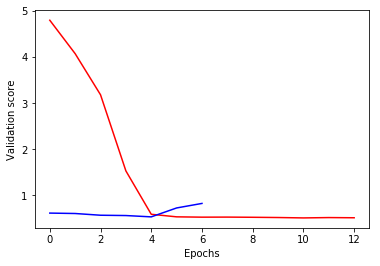

In [15]:
#Indicamos la condición de parada del modelo
early_stopping_monitor = EarlyStopping(patience = 2)

#Nos creamos el primer modelo
model_1 = Sequential()

#Nos creamos la primera capa oculta
model_1.add(Dense(10, activation = "relu", input_shape = (n_predictors,)))

#Nos creamos la segunda capa oculta
model_1.add(Dense(10, activation = "relu"))

#Nos creamos la capa de salida
model_1.add(Dense(2, activation = "softmax"))

#Nos creamos el segundo modelo
model_2 = Sequential()

#Nos creamos la primera capa oculta 
model_2.add(Dense(100, activation = "relu", input_shape = (n_predictors,)))

#Nos creamos la segunda capa oculta
model_2.add(Dense(100, activation = "relu"))

#Nos creamos la capa de salida
model_2.add(Dense(2, activation = "softmax"))

#Compilamos los dos modelos
model_1.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

#Ahora procedemos a fijar o entrenar los modelos
trainnig_model_1 = model_1.fit(np_predictors, target, validation_split = 0.2, epochs = 15, 
                               callbacks = [early_stopping_monitor], verbose = False)

trainnig_model_2 = model_2.fit(np_predictors, target, validation_split = 0.2, epochs = 15,
                               callbacks = [early_stopping_monitor], verbose = False)

#Visualizamos los resultados de ambos modelos
import matplotlib.pyplot as plt
plt.plot(trainnig_model_1.history["val_loss"], "r", trainnig_model_2.history["val_loss"], "b")
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()